# Finance Data Project ( Bitcoin)



# Methods for stock price forcasting 
___
    1. Fundamental Analysis
    2. Technical Analysis
    3. Time Series Forecasting
  ___

### 1. Fundamental Analysis 
share value of a company is estimated by analyzing:
* sales
* earnings
* profits 
* other economic factors

This method is most suited for long term forecasting
___


### 2. Technical Analysis
* uses the historical price of stocks for identifying the future price.
        - Moving average (most common algorithm)
 
 This method is suitable for short term predictions.
 ___

###  3. Time Series Forecasting

This involves 2 types of algorithms
* Linear Models (AR, ARMA, ARIMA) 
* Non Linear Models (Deep learning algorithms)
     -  inter dependency between **stock price** and **stock volume**
     
**Deep learning Algorithms :** 

- Multi layer perceptrons (MLP)
- Recursive Neural Networks (RNN)
- CNN(Convolutional Neural Network)
- **Long Short Term Memory (LSTM)**

___



### Trading 
- Algoritmic Trading  (use minute wise data of the stock)

In [1]:
from pandas_datareader import data as pdr
import pandas as pd
import numpy as np
import seaborn as sns
import datetime
import matplotlib.pyplot as plt
import yfinance as yf
%matplotlib inline

C:\Users\Yasser Bigdeli\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
import matplotlib , numpy, seaborn
print('matplotlib' , ' version' ,'\t', matplotlib.__version__)
print('numpy  ' , ' version' ,'\t', numpy.__version__)
print('Seaborn' , ' version','\t' , seaborn.__version__)

matplotlib  version 	 3.3.4
numpy    version 	 1.19.5
Seaborn  version 	 0.9.0


In [3]:
# !pip install yfinance --upgrade --no-cache-dir
# !pip install pandas_datareader

In [4]:
# set style
sns.set(style='ticks', palette='bright')

## Bitcoin Data from 2010-2021 
* GOOG



In [6]:
from pandas_datareader import data as pdr
import yfinance as yf

tickers = ['BTC-USD']
start = datetime.datetime(2011,1,1)
end = datetime.datetime(2021,8,27)
df = yf.download(tickers, start=start, end=end)

[*********************100%***********************]  1 of 1 completed


In [7]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-08-23,49291.675781,50482.078125,49074.605469,49546.148438,49546.148438,34305053719
2021-08-24,49562.347656,49878.769531,47687.117188,47706.117188,47706.117188,35361168834
2021-08-25,47727.257812,49202.878906,47163.613281,48960.789062,48960.789062,32646349931
2021-08-26,49002.640625,49347.582031,46405.781250,46942.218750,46942.218750,32666549568
2021-08-27,46894.554688,49112.785156,46394.281250,49058.667969,49058.667969,34511076995


In [8]:
df=pd.DataFrame(df['Close'])
df.tail()

,Close
Date,
2021-08-23,49546.148438
2021-08-24,47706.117188
2021-08-25,48960.789062
2021-08-26,46942.218750
2021-08-27,49058.667969


Text(0, 0.5, 'Bitcoin Stock Price (USD)')

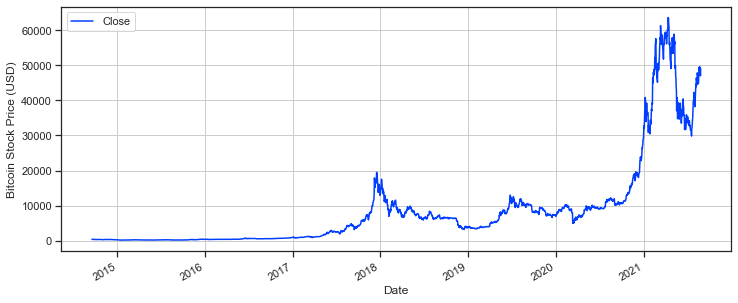

In [9]:
fig, ax=plt.subplots(1,1,figsize=(12,5))
df.plot(kind='line', ax=ax)
ax.grid('on')
ax.set_ylabel('Bitcoin Stock Price (USD)')

# Moving averages 


In [10]:
#Simple  Moving Average, SMA 
win=30
SMA=df.rolling(window=win).mean() 

In [11]:
#Weighted Moving Average (WMA)
weights = np.arange(1,win+1) #this creates an array with integers 1 to 'win' included
WMA=df.rolling(window=win).apply(lambda prices:np.dot(prices, weights)/weights.sum())

#### Exponential Moving Average (EMA)
___

$$EMA_t = \alpha Price_t + (1- \alpha) EMA_{t-1} $$

$$ \alpha = \frac{2}{n+1} $$ 
n=30 
$$ \alpha =\frac{2}{30+1} = 0.06451 $$

In [12]:
EMA=df.ewm(span=win).mean()


#### Visualizing the calculated averages

(16436.0, 18900.0)

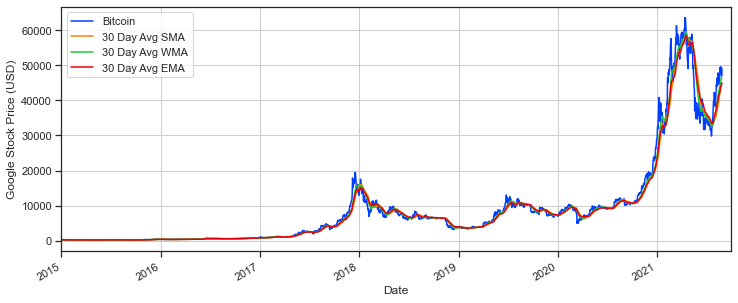

In [15]:
fig, ax=plt.subplots(1,1,figsize=(12,5))
# Google close value
df.plot(kind='line', ax=ax)

# Simple Moving Average 
SMA.plot(kind='line', ax=ax) 

 #  Weighted Moving Average (WMA)
WMA.plot(kind='line', ax=ax)

# Exponential Moving Average (EMA)
EMA.plot(kind='line', ax=ax)

ax.set_ylabel('Google Stock Price (USD)')
ax.legend(['Bitcoin',  str(win)+' Day Avg SMA',  str(win)+' Day Avg WMA', str(win)+' Day Avg EMA'])
ax.grid('on')
ax.set_xlim([datetime.date(2015,1,1), datetime.date(2021,9,30)])

### Financial Statistics 
Returns for each stock. 
$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

In [16]:
# Daily Returns
returns=df.pct_change()

In [17]:
returns.head()

,Close
Date,
2014-09-17,NaN
2014-09-18,-0.071926
2014-09-19,-0.069843
2014-09-20,0.035735
2014-09-21,-0.024659


In [18]:
returns.dropna(inplace=True)

In [19]:
#  Minimum and Maximum daily returns
print('The minimum return for Google is {:.2f} % on {}'.format(100*returns.min()[0], returns.idxmin()[0].date()))
print('The maximum return for Google is {:.2f} % on {}'.format(100*returns.max()[0], returns.idxmax()[0].date()))

The minimum return for Google is -37.17 % on 2020-03-12
The maximum return for Google is 25.25 % on 2017-12-07


In [20]:
# Standard Deviation (Volatility)
print('Risk of Google stock is {:0.2f} %'.format(100*returns.std()[0]))

Risk of Google stock is 3.92 %


#### Gussian Distribution fit to daily returns

<AxesSubplot:>

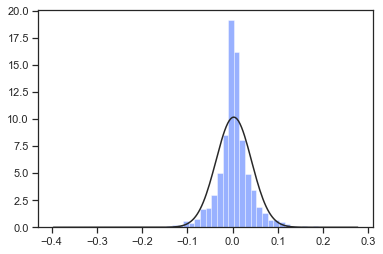

In [21]:
from scipy.stats import norm
sns.distplot(returns,kde=False, fit=norm)

In [22]:
print('std: {:.4f} mean: {:.4f}'.format(returns.std()[0], returns.mean()[0]))


std: 0.0392 mean: 0.0026


No handles with labels found to put in legend.


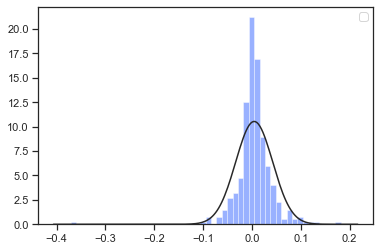

In [23]:
sns.distplot(returns[returns.index.year==2020],kde=False,  fit=norm)
plt.legend()

Text(0, 0.5, 'Daily Return')

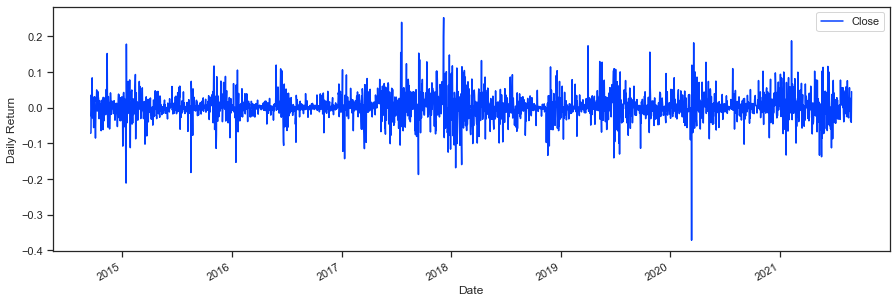

In [24]:
returns.plot.line(figsize=(15,5))
plt.ylabel('Daily Return')

### Fraction of data for Machine learning 

In [25]:
df1=df.reset_index()['Close']

In [26]:
df1

0         457.334015
1         424.440002
2         394.795990
3         408.903992
4         398.821014
            ...     
2528    49546.148438
2529    47706.117188
2530    48960.789062
2531    46942.218750
2532    49058.667969
Name: Close, Length: 2533, dtype: float64

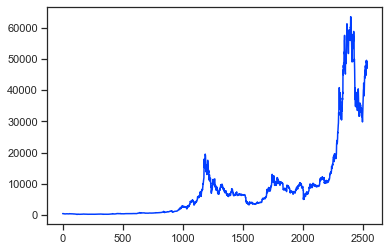

In [27]:
import matplotlib.pyplot as plt
plt.plot(df1)

### Train and Test  data  
### Data transformation: Normalization 

In [28]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler=MinMaxScaler()
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [29]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.9)
test_size=len(df1)-training_size

train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [30]:
training_size,test_size

(2279, 254)

In [31]:
train_data.shape , test_data.shape


((2279, 1), (254, 1))

In [32]:
train=pd.DataFrame(df.iloc[0:training_size])
test= pd.DataFrame(df.iloc[training_size:len(df1)])

In [33]:
test.size

254

### Time Series Generator 

In [34]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [35]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)



In [36]:
X_train.shape, y_train.shape

((2178, 100), (2178,))

In [37]:
X_test.shape, y_test.shape

((153, 100), (153,))

In [38]:
X_test[1][-1], y_test[0]

(0.8810911454453663, 0.8810911454453663)

In [39]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [40]:
X_train.shape , y_train.shape

((2178, 100, 1), (2178,))

In [41]:
X_test.shape , y_test.shape

((153, 100, 1), (153,))

# Creating LSTM Model 

In [42]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, LSTM, Dropout

In [43]:
n_features = 1

In [44]:
model = Sequential()
model.add(LSTM(128, input_shape=(X_test.shape[1], n_features), return_sequences=True))
# model.add(Dropout(rate=0.5))
model.add(LSTM(64, input_shape=(X_test.shape[1], n_features), return_sequences=False))
model.add(Dense(25,activation='relu'))
model.add(Dense(1, activation='linear'))
model.compile(optimizer='adam', loss='mse')

In [45]:
# length

In [46]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 128)          66560     
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dense (Dense)                (None, 25)                1625      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 26        
Total params: 117,619
Trainable params: 117,619
Non-trainable params: 0
_________________________________________________________________


In [47]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=12,batch_size=64,verbose=1)

Epoch 1/12
35/35 [==============================] - 8s 142ms/step - loss: 0.0011 - val_loss: 0.0056
Epoch 2/12
35/35 [==============================] - 4s 112ms/step - loss: 1.3353e-04 - val_loss: 0.0083
Epoch 3/12
35/35 [==============================] - 4s 111ms/step - loss: 1.2316e-04 - val_loss: 0.0070
Epoch 4/12
35/35 [==============================] - 4s 116ms/step - loss: 1.0570e-04 - val_loss: 0.0033
Epoch 5/12
35/35 [==============================] - 4s 118ms/step - loss: 1.0724e-04 - val_loss: 0.0085
Epoch 6/12
35/35 [==============================] - 4s 112ms/step - loss: 1.1220e-04 - val_loss: 0.0055
Epoch 7/12
35/35 [==============================] - 4s 118ms/step - loss: 9.6943e-05 - val_loss: 0.0099
Epoch 8/12
35/35 [==============================] - 4s 111ms/step - loss: 9.9562e-05 - val_loss: 0.0093
Epoch 9/12
35/35 [==============================] - 4s 120ms/step - loss: 8.7441e-05 - val_loss: 0.0111
Epoch 10/12
35/35 [==============================] - 4s 117ms/step -

In [48]:
losses=pd.DataFrame(model.history.history)


<AxesSubplot:>

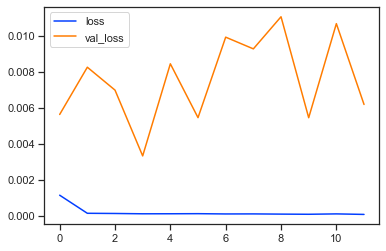

In [49]:
losses.plot()

### We will put this logic in a for loop

In [50]:
test_predict=model.predict(X_test)


In [51]:
test_predict.shape

(153, 1)

In [52]:
true_prediction=scaler.inverse_transform(test_predict)

In [53]:
true_prediction.shape

(153, 1)

In [54]:
test.shape

(254, 1)

In [55]:
test_compare=test.iloc[-153:]

In [56]:
test_compare['True_pred']=true_prediction

C:\Users\Yasser Bigdeli\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


<AxesSubplot:xlabel='Date'>

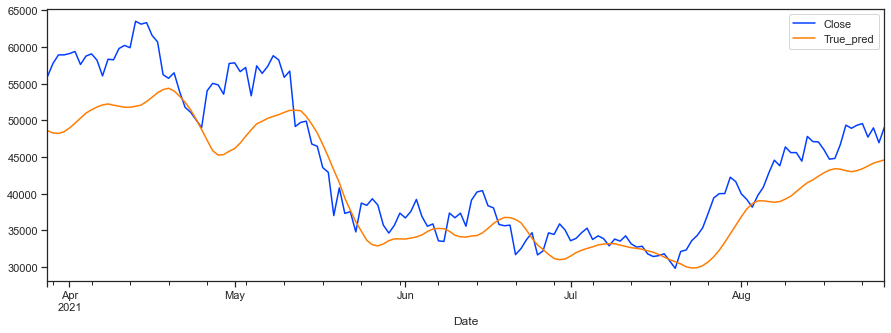

In [57]:
test_compare.plot.line(figsize=(15,5))

In [58]:
X_test.shape

(153, 100, 1)

In [59]:
first_batch=X_test[-1].reshape(1,100,1)


In [60]:
first_batch_pred= model.predict(first_batch)

In [61]:
first_batch_pred[0][0]

0.7013282

In [62]:
scaler.inverse_transform(first_batch_pred)

array([[44589.96]], dtype=float32)

In [63]:
test_predictions=[]
first_eval_batch=X_test[-1:]
current_batch=first_eval_batch.reshape((1,time_step, n_features))
for i in range (30):
        current_pred= model.predict(current_batch)[0][0]
        test_predictions.append(current_pred)
        current_batch=np.append(current_batch[:,1:,:], [[[current_pred]]], axis=1)


In [64]:
test_predictions=np.array(test_predictions).reshape(30,1)

In [65]:
true_pred = scaler.inverse_transform(test_predictions)

In [66]:
forcast=pd.DataFrame(true_pred)

In [67]:
days = pd.date_range(start='2021-08-27', end='2021-09-25')

In [68]:
forcast['Date']=days

In [69]:
forcast.set_index('Date', inplace=True)

In [70]:
forcast.rename({0: 'Forcast'}, axis=1, inplace=True)

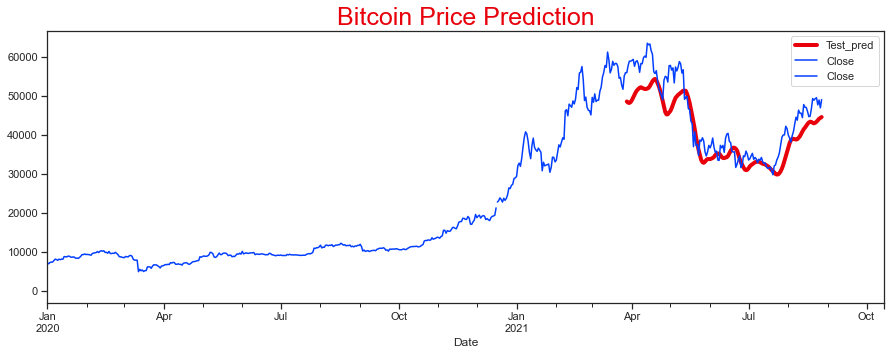

In [79]:
ax=plt.gca()
# forcast.plot(ax=ax, color='g', label='Forecasted price')
test_compare['True_pred'].plot.line(figsize=(15,5), ax=ax, lw=4, color='r', label='Test_pred')
train.plot.line(ax=ax, color='b', label='Bicoin price')
test.plot.line(ax=ax, color='b', label='Bicoin price')
ax.set_xlim([datetime.date(2020,1,1), datetime.date(2021,10,15)])
ax.legend()
plt.title('Bitcoin Price Prediction',fontsize=25, color='r')
plt.savefig('Bitcoin pred.png',dpi=800, bbox_inches='tight' )

In [80]:
test_compare.tail()

,Close,True_pred
Date,,
2021-08-23,49546.148438,43396.316406
2021-08-24,47706.117188,43754.320312
2021-08-25,48960.789062,44155.472656
2021-08-26,46942.218750,44383.164062
2021-08-27,49058.667969,44589.960938
